***
# **<center>COURS PYTHON 2IMACS #10</center>**
# ***<center>Traitement d'images</center>***
# ***<center>Open Cv</center>***
# ***<center>PIL</center>***
# ***<center>Scikit Image</center>***
***

Plusieurs bibliothèques Python sont disponibles pour réaliser des traitements d'images. Nous allons notamment voir comment appliquer differents filtres , seuiller des images, détecter et mesurer des objets présents dans ces images.

## 10-1 Bibliothèque OpenCv

##### OpenCv pour Open Computer Vision est développées en C++, Python et Java, elle permet les opérations de bas de traitement d'image (lectrure ecriture, sauvegarde, calcul d'histogrammes, seuillages...).
Elle permet également de travailler sur des vidéos.

## 10-1-1 Ouverture et Format

OpenCv peut ouvrir la plupart des format d'images courant(jpg, png, tif, bpm...). Aprés l'importation de la bibliothèque, affectons les données contenues dans le fichier tournesols.jpg à img

In [1]:
import cv2
img = cv2.imread("fichiers_cours/tournesols.jpg")

Affichons l'image img et donnons lui un titre. 
Attention: avec k = cv2.waitKey(0) on précise qu'on attend une action pour fermer l'image, il est conseillé de la fermer avec la x en haut à gauche. 

In [2]:
cv2.imshow("Le titre pour le bandeau de mon image",img)
k = cv2.waitKey(0)

img est maintenant un tableau numpy

In [3]:
print(type(img))

<class 'numpy.ndarray'>


Visualisons ses dimensions:

In [4]:
import numpy as np
print('dimensions : ',img.shape)
# Trouver les valeurs minimale et maximale avec numpy
min_val = np.min(img)
max_val = np.max(img)
print('valeur mini pixel : ',min_val,'valeur maxi pixel : ', max_val)

dimensions :  (600, 800, 3)
valeur mini pixel :  0 valeur maxi pixel :  255


On a bien une image couleur en 3 canaux de dimension 800x600

L'image peut être convertie en niveaux de gris avec cvtColor

In [5]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
cv2.imshow("Niveaux de gris",img_gray )
k = cv2.waitKey(0)

Il est possible de sauvegarder l'image après modification:

In [6]:
cv2.imwrite('fichiers_cours/fichiers_crees/nouvelle_image.jpg', img_gray)

True

## 10-1-2 Coordonnées et figures géométriques

On peut ajouter des figures géométriques sur l'image en précisant les coordonnées, les propriétés du trait...

Un cercle

In [7]:
# Dessiner un cercle rouge
center_coordinates = (400, 300)
radius = 50
color = (0, 0, 255)  # Rouge en format BGR
thickness = 3

# Utiliser la fonction circle pour dessiner le cercle
img_draw = cv2.circle(img, center_coordinates, radius, color, thickness)

cv2.imshow("Figures",img_draw )
k = cv2.waitKey(0)

Si on veut une figure pleine, on met le thickness à -1

In [8]:
# Dessiner un cercle rouge
center_coordinates = (400, 300)
radius = 50
color = (0, 0, 255)  # Rouge en format BGR
thickness = -1

# Utiliser la fonction circle pour dessiner le cercle
img_draw = cv2.circle(img, center_coordinates, radius, color, thickness)

cv2.imshow("Figures",img_draw )
k = cv2.waitKey(0)

Un rectangle

In [9]:
# Dessiner un rectangle vert
start_point = (350, 250)
end_point = (500, 550)
color = (0, 255, 0)  # Vert en format BGR
thickness = 3

# Utiliser la fonction rectangle pour dessiner le rectangle
img_draw = cv2.rectangle(img, start_point, end_point, color,thickness)

cv2.imshow("Figures",img_draw )
k = cv2.waitKey(0)

Pour un polygone 

In [10]:
import numpy as np
# Définir les angles d'un pentagone
pentagon_points = np.array([
    [200, 300],  # Point 1
    [300, 200],  # Point 2
    [400, 200],  # Point 3
    [500, 300],  # Point 4
    [350, 400],  # Point 5
], np.int32)

# Reshape pour s'assurer que l'array est dans le bon format
pentagon_points = pentagon_points.reshape((-1, 1, 2)) # A PRECISER
# Dessiner le pentagone (rouge) sur l'image
color = (250, 50, 50)  # Couleur en format BGR
thickness = 3

# Utiliser la fonction polylines pour dessiner le pentagone
img_pentagon = cv2.polylines(img, [pentagon_points], isClosed=True, color=color, thickness=thickness)


cv2.imshow("Figures",img_pentagon)
k = cv2.waitKey(0)

## 10-1-3 Filtres et seuillages

Le seuillage en traitement d'image est essentiel pour simplifier et segmenter les images en distinguant les objets d'intérêt du fond, facilitant ainsi l'analyse et la détection.
La fonction threshold ne peut être appliqué qu'à une image en niveaux de gris, commençons par une conversion:

In [11]:
img = cv2.imread("fichiers_cours/formes.png")
cv2.imshow("Formes",img)
k = cv2.waitKey(0)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
cv2.imshow("Formes",img_gray)
k = cv2.waitKey(0)

Il est parfois necessaire de filtrer ou flouter l'image avant seuillage pour enlever ou attenuer le bruit

## 10-1-4 Détection de contours

Detection canny

In [12]:
edges = cv2.Canny(img, 50, 150) # on peut jouer sur les seuils bas et seuils hauts
cv2.imshow("Canny",edges)
k = cv2.waitKey(0)

Hough

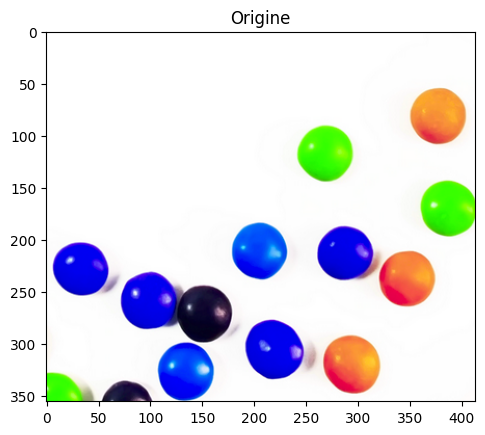

In [13]:
import matplotlib.pyplot as plt
img = cv2.imread("fichiers_cours/smarties.png")
# cv2.imshow('Smarties',img)
# k = cv2.waitKey(0)
plt.imshow(img)
plt.title('Origine')
plt.show()

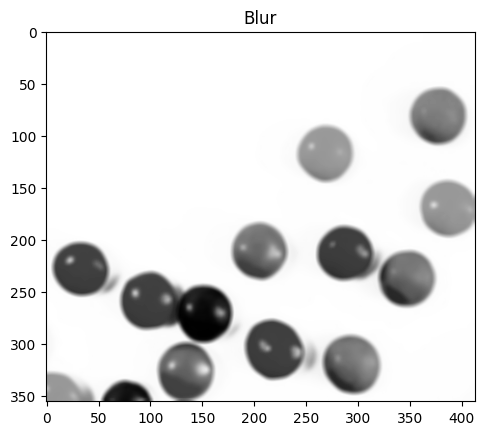

In [14]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.blur(img_gray,(5,5))
plt.imshow(img_blur, cmap='gray')
plt.title('Blur')
plt.show()

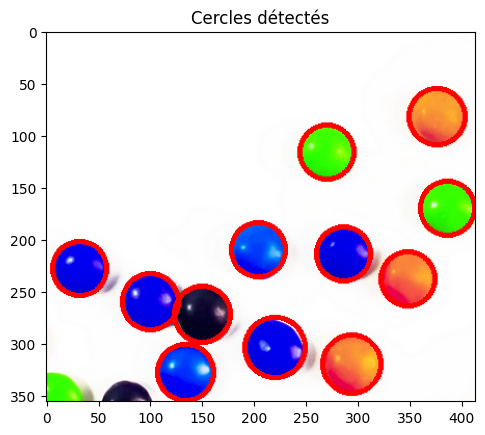

In [15]:


circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 10,
                               param1=100, param2=30,
                               minRadius=1, maxRadius=30)

circles = np.uint16(np.around(circles))

# Dessiner les cercles détectés sur l'image

for i in circles[0, :]:
    cv2.circle(img, (i[0], i[1]), i[2], (255, 0, 0), 3)

# Afficher l'image avec les cercles détectés
plt.imshow(img, cmap='gray')
plt.title('Cercles détectés')
plt.show()


circles renvoit un tableau numpy de la forme  [[[x1, y1, r1], [x2, y2, r2], ..., [xn, yn, rn]]] avec x ey y coordonnées du centre et r rayon

Seuils

Detection de contours

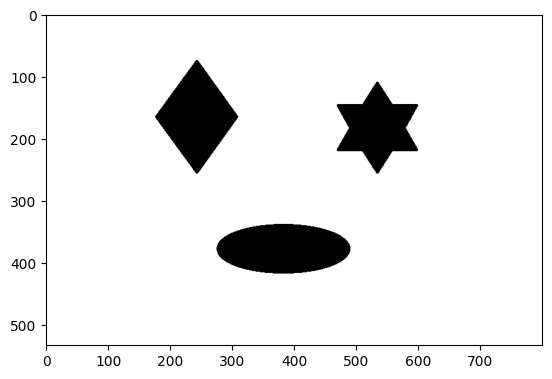

250.0


In [16]:
img = cv2.imread("fichiers_cours/formes.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret1,threshold=cv2.threshold(img_gray,250,255,cv2.THRESH_BINARY)  
plt.imshow(threshold,cmap = 'gray')
plt.show()
print(ret1)

Detection des contours

In [17]:
contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [1]:
print(len(contours),' contours trouves')
print('Le contour n°1 comporte', contours[1].shape[0],'points')
print(contours[1])

NameError: name 'contours' is not defined

In [19]:
print(hierarchy.shape)
print(hierarchy)


(1, 4, 4)
[[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [-1  2 -1  0]]]


- threshold: L'image seuillée à partir de laquelle les contours seront extraits.

- cv2.RETR_TREE: Le mode de récupération de contours. Il spécifie la manière dont les contours sont organisés dans la hiérarchie. cv2.RETR_TREE crée une structure de hiérarchie complète et reconstruit tous les contours.

- cv2.CHAIN_APPROX_SIMPLE: La méthode d'approximation des contours. Elle spécifie comment les contours doivent être stockés après l'approximation. cv2.CHAIN_APPROX_SIMPLE compresse les segments laisse seulement leurs points finaux.

La fonction reourne:

- contours: Un tuple contenant tous les contours trouvés dans l'image seuillée. Chaque contour est représenté sous forme de tableau numpy 2D contenant les coordonnées (x, y) des points constituant le contour.

- hierarchy: Une structure de données représentant la hiérarchie entre les contours. Elle est souvent utilisée pour identifier les contours internes et externes. Dans ce cas, elle n'est pas utilisée directement dans le code que vous avez fourni.

Le tableau hierarchy contient un tableau de 4 valeurs par contour.   
Ces 4 valeurs représentent:   
- Next: Index du contour suivant sur le même niveau hiérarchique.
- Previous: Index du contour précédent sur le même niveau hiérarchique.
- First_Child: Index du premier contour enfant.
- Parent: Index du contour parent.
      
Par exemple la premiere ligne [-1, -1, 1, -1] indique:
- Next (-1): Il n'y a pas de contour suivant sur le même niveau, donc la valeur est -1.
- Previous (-1): Il n'y a pas de contour précédent sur le même niveau, donc la valeur est -1.
- First_Child (1): Il a un contour enfant, et le premier contour enfant a l'index 1.
- Parent (-1): Il n'a pas de contour parent.
C'est le contours qui contient tous les autres.   
La ligne [ 4  2 -1  0] indique:
- Next (4): Il y a un contour suivant sur le même niveau, et son indice est 4.
- Previous (2): Il y a un contour précédent sur le même niveau, et son indice est 2.
- First_Child (-1): Il n'y a pas de contour enfant, donc la valeur est -1.
- Parent (0): Il a un contour parent, et son indice est 0.

4 contours detectes


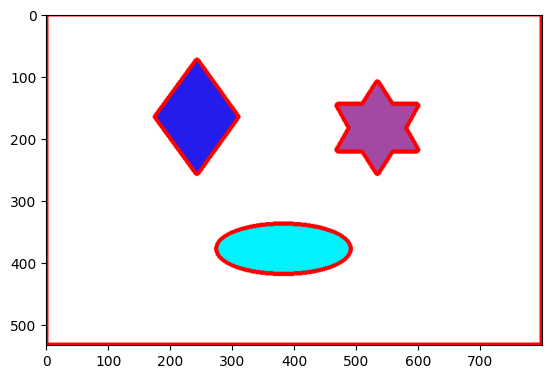

In [20]:

for cnt in contours:
    cv2.drawContours(img, [cnt], -1, (255, 0, 0), 5)

print(len(contours),'contours detectes')

plt.imshow(img)
plt.show()

Ajoutons les numeros de chaque contour:

4 contours détectés


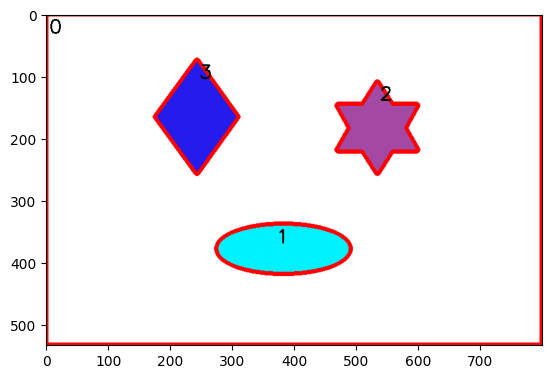

In [21]:
for i, cnt in enumerate(contours):
    cv2.drawContours(img, [cnt], -1, (255, 0, 0), 5)
    x, y = cnt[0][0]

    cv2.putText(img, str(i), (x+5,y+30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2) # +5 et +30 pour que le zero soit dans l'image

print(len(contours), 'contours détectés')

plt.imshow(img)
plt.show()


Fome dans rectangle ou ellipse minimal

((399.5, 266.0), (532.0, 799.0), 90.0)
((382.5, 377.5), (217.0, 81.0), 0.0)
((534.0, 182.5), (130.36050415039062, 150.82623291015625), 60.2551155090332)
((242.96470642089844, 165.0257568359375), (149.81248474121094, 111.47516632080078), 53.88065719604492)


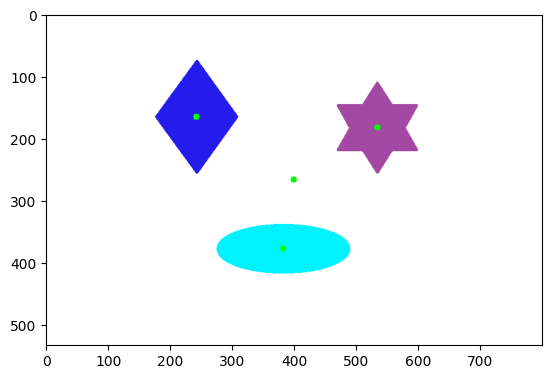

In [22]:
img = cv2.imread("fichiers_cours/formes.png")
for cnt in contours:
    # Obtenir le rectangle englobant orienté
    rect = cv2.minAreaRect(cnt)
    print(rect)
    coord0 = tuple(map(int,rect[0]))
    cv2.circle(img, coord0, 5, (0, 255, 0), -1) #point vert au centre de chaque rectangle


plt.imshow(img)
plt.show()

rect[0] : coordonnées du centre du rectangle.  
rect[1] : dimensions du rectangle (largeur, hauteur).
rect[2] : l'angle de rotation du rectangle.

On peut convertir ces valeurs avec cv2.boxPoints():  
box = cv2.boxPoints(rect)  


[[  0   0]
 [799   0]
 [799 532]
 [  0 532]]
[[274 418]
 [274 337]
 [491 337]
 [491 418]]
[[436 163]
 [567  88]
 [632 202]
 [501 277]]
[[154 137]
 [244  72]
 [332 193]
 [242 258]]


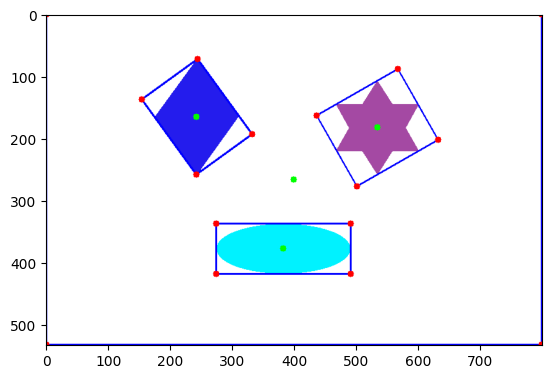

In [23]:
img = cv2.imread("fichiers_cours/formes.png")
for cnt in contours:
    # Obtenir le rectangle englobant orienté
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.round(box).astype(int)
    cv2.drawContours(img, [box], 0, (0, 0, 255), 2)  # Dessiner le rectangle en rouge
    print(box)
    coord0 = tuple(map(int,rect[0]))
    cv2.circle(img, coord0, 5, (0, 255, 0), -1)

    # Point rouge à chaque coin du rectangle
    for i in range(len(box)):
        cv2.circle(img, tuple(box[i]), 5, (255, 0, 0), -1)


plt.imshow(img)
plt.show()

Calcul des ratios de convexité:

1.0
0.9900396272892792
0.7185562146131033
0.9873007295325588
4 contours detectes


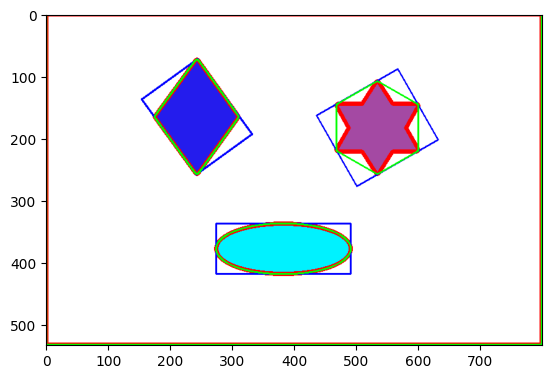

In [24]:
img = cv2.imread("fichiers_cours/formes.png")
for cnt in contours:
    cv2.drawContours(img, [cnt], -1, (255, 0, 0), 5)
    # Obtenir le rectangle englobant orienté
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.round(box).astype(int)
    cv2.drawContours(img, [box], 0, (0, 0, 255), 2)  # Dessiner le rectangle en rouge

    # Calculer le polygone convexe
    hull = cv2.convexHull(cnt)
    # Calculer la surface du polygone convexe et la surface du contour d'origine
    area_hull = cv2.contourArea(hull)
    area_contour = cv2.contourArea(cnt)
    ratio_convexite = area_contour / area_hull
    print(ratio_convexite)
                   
    # Dessiner le polygone convexe (vert)
    cv2.drawContours(img, [hull], -1, (0, 255, 0), 2)


plt.imshow(img)
plt.show()

Video

In [7]:
import cv2

# Chemin vers le fichier vidéo
video_path = "fichiers_cours/ma_video.mp4"

# Ouvrir la vidéo
cap = cv2.VideoCapture(video_path)

# Vérifier si la vidéo est ouverte correctement
if not cap.isOpened():
    print("Erreur: Impossible d'ouvrir la vidéo.")
    exit()

# Lire et afficher les images de la vidéo
while True:
    ret, frame = cap.read()

    # Vérifier si la lecture de la vidéo est terminée
    if not ret:
        break

    # Redimensionner le cadre en diminuant de moitié
    frame_resized = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)

    # Afficher le cadre redimensionné
    cv2.imshow("Ma video redimensionnee", frame_resized)

    # Attendre 25 millisecondes (vous pouvez ajuster cette valeur selon votre préférence)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Libérer les ressources
cap.release()
cv2.destroyAllWindows()



Ajoutons un traitement , par exemple passons l'image en niveaux de gris

In [5]:
import cv2

# Chemin vers le fichier vidéo
video_path = "fichiers_cours/ma_video.mp4"

# Ouvrir la vidéo
cap = cv2.VideoCapture(video_path)

# Vérifier si la vidéo est ouverte correctement
if not cap.isOpened():
    print("Erreur: Impossible d'ouvrir la vidéo.")
    exit()

# Lire et afficher les images de la vidéo
while True:
    ret, frame = cap.read()

    # Vérifier si la lecture de la vidéo est terminée
    if not ret:
        break

    # Redimensionner le cadre en diminuant de moitié
    frame_resized = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)

    # Convertir l'image en niveaux de gris
    frame_gray = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2GRAY)

    # Afficher le cadre redimensionné en niveaux de gris
    cv2.imshow("Ma video en niveaux de gris", frame_gray)

    # Attendre 25 millisecondes (vous pouvez ajuster cette valeur selon votre préférence)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Libérer les ressources
cap.release()
cv2.destroyAllWindows()


In [ ]:
On a maintenant accés aux outils vus pour les images.

In [ ]:
Detection de visage

In [2]:
# Detection de visages
import cv2

# Enable camera
cap = cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 420)

# import cascade file for facial recognition
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


# if you want to detect any object for example eyes, use one more layer of classifier as below:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye_tree_eyeglasses.xml")


while True:
    success, img = cap.read()
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Getting corners around the face
    faces = faceCascade.detectMultiScale(imgGray, 1.3, 5)  # 1.3 = scale factor, 5 = minimum neighbor
    # drawing bounding box around face
    for (x, y, w, h) in faces:
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)


    # detecting eyes
    eyes = eyeCascade.detectMultiScale(imgGray)
    # drawing bounding box for eyes
    for (ex, ey, ew, eh) in eyes:
        img = cv2.rectangle(img, (ex, ey), (ex+ew, ey+eh), (255, 0, 0), 3)


    cv2.imshow('face_detect', img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
# cv2.destroyWindow('face_detect')
cv2.destroyAllWindows()  # Utilisez cv2.destroyAllWindows() pour fermer correctement toutes les fenêtres


- rect = cv2.minAreaRect(cnt) :  calcule le rectangle orienté minimal qui englobe le contour. rect est un tuple qui représente ce rectangle orienté.

box = cv2.boxPoints(rect) : La fonction cv2.boxPoints() est utilisée pour obtenir les quatre coins du rectangle orienté. Ces coins sont retournés sous la forme d'un tableau numpy.

box = np.round(box).astype(int) : Les coordonnées des coins du rectangle sont arrondies à l'entier le plus proche, car les coordonnées des pixels doivent être des valeurs entières.

cv2.drawContours(img, [box], 0, (0, 0, 255), 2) : La fonction cv2.drawContours() est utilisée pour dessiner le rectangle orienté sur l'image originale (img). Le paramètre [box] spécifie les contours à dessiner, 0 est l'indice du contour dans la liste (dans ce cas, il n'y a qu'un contour), (0, 0, 255) est la couleur du rectangle (rouge dans l'espace des couleurs BGR), et 2 est l'épaisseur de la ligne.

Si on a un fond bruité, la détection devient compliquée

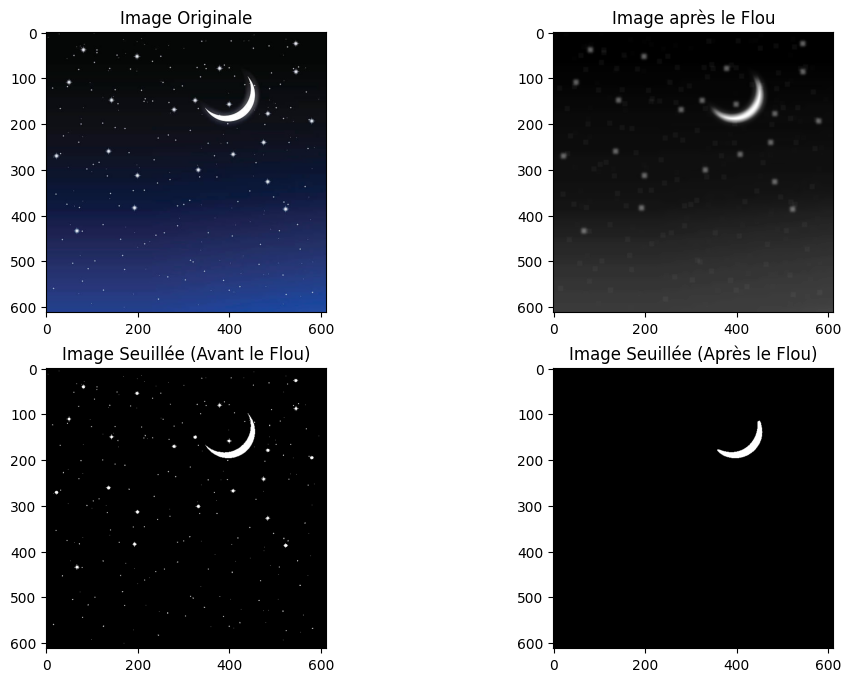

Valeur de seuil pour l'image seuillée après le flou: 140.0


In [25]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("fichiers_cours/moon.jpg")

# Convertir en niveaux de gris
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Appliquer le flou
img_blur = cv2.blur(img_gray, (11, 11))

# Appliquer le seuillage avant le flou
ret1, threshold1 = cv2.threshold(img_gray, 140, 255, cv2.THRESH_BINARY)

# Appliquer le seuillage après le flou
ret2, threshold2 = cv2.threshold(img_blur, 140, 255, cv2.THRESH_BINARY)

# Créer une figure avec des sous-graphiques (2 lignes, 2 colonnes)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Afficher l'image originale
axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Image Originale')

# Afficher l'image après le flou
axes[0, 1].imshow(img_blur, cmap='gray')
axes[0, 1].set_title('Image après le Flou')

# Afficher l'image seuillée avant le flou
axes[1, 0].imshow(threshold1, cmap='gray')
axes[1, 0].set_title('Image Seuillée (Avant le Flou)')

# Afficher l'image seuillée après le flou
axes[1, 1].imshow(threshold2, cmap='gray')
axes[1, 1].set_title('Image Seuillée (Après le Flou)')

plt.show()

print("Valeur de seuil pour l'image seuillée après le flou:", ret2)


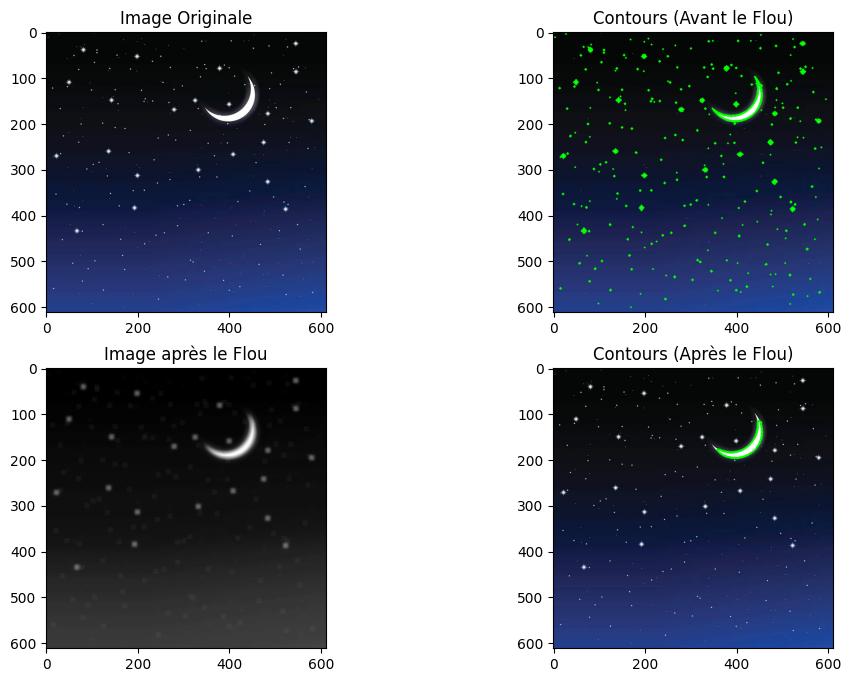

Nombre de contours (Avant le Flou): 247
Nombre de contours (Après le Flou): 1


In [26]:

img = cv2.imread("fichiers_cours/moon.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.blur(img_gray, (11, 11))

ret1, threshold1 = cv2.threshold(img_gray, 140, 255, cv2.THRESH_BINARY)
contours1, hierarchy1 = cv2.findContours(threshold1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

ret2, threshold2 = cv2.threshold(img_blur, 140, 255, cv2.THRESH_BINARY)
contours2, hierarchy2 = cv2.findContours(threshold2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Créer une figure avec des sous-graphiques (2 lignes, 2 colonnes)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Afficher l'image originale
axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Image Originale')

# Afficher les contours avant le flou
img_contours1 = img.copy()
for cnt in contours1:
    cv2.drawContours(img_contours1, [cnt], -1, (0, 255, 0), 3)
axes[0, 1].imshow(cv2.cvtColor(img_contours1, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Contours (Avant le Flou)')

# Afficher l'image après le flou
axes[1, 0].imshow(img_blur, cmap='gray')
axes[1, 0].set_title('Image après le Flou')

# Afficher les contours après le flou
img_contours2 = img.copy()
for cnt in contours2:
    cv2.drawContours(img_contours2, [cnt], -1, (0, 255, 0), 3)
axes[1, 1].imshow(cv2.cvtColor(img_contours2, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Contours (Après le Flou)')

plt.show()

print("Nombre de contours (Avant le Flou):", len(contours1))
print("Nombre de contours (Après le Flou):", len(contours2))


Séance 1 : Introduction au Traitement d'Images avec Python (1 heure)

- Partie 1 : Introduction au Traitement d'Images (20 minutes)
        Présentation de l'importance du traitement d'images en physique et dans d'autres domaines.
        Aperçu des applications du traitement d'images.

- Partie 2 : Bibliothèques de Traitement d'Images en Python (20 minutes)
        Brève introduction aux principales bibliothèques de traitement d'images : OpenCV, scikit-image, Pillow (PIL).
        Discussion des spécificités de chaque bibliothèque.

- Partie 3 : Chargement et Affichage d'Images (20 minutes)
        Utilisation de Pillow (PIL) pour charger et afficher une image en Python.
        Exemple pratique : Chargement et affichage d'une image.

Séance 2 : Manipulation d'Images et Opérations de Base (1 heure)

- Partie 4 : Manipulation de Pixels (20 minutes)
        Accès et modification des pixels d'une image.
        Exemple pratique : Modification de pixels pour créer des effets simples.

- Partie 5 : Conversion de Formats d'Image (20 minutes)
        Conversion entre différents formats d'image (PNG, JPEG, TIFF, etc.) en utilisant Pillow (PIL).
        Exemple pratique : Conversion d'une image d'un format à un autre.

- Partie 6 : Exercices Pratiques (20 minutes)
        Les étudiants travaillent sur des exercices pratiques pour mettre en pratique les concepts abordés jusqu'à présent.

Séance 3 : Opérations Avancées en Traitement d'Images (1 heure)

- Partie 7 : Filtres et Effets d'Images (20 minutes)
        Introduction aux filtres d'images pour améliorer ou modifier des images.
        Exemple pratique : Application de filtres de flou et de renforcement des bords.

- Partie 8 : Histogrammes d'Images (20 minutes)
        Calcul et tracé d'histogrammes d'images en Python.
        Exemple pratique : Tracé de l'histogramme d'une image et analyse.

- Partie 9 : Exercices Pratiques Avancés (20 minutes)
        Les étudiants travaillent sur des exercices avancés pour explorer davantage le traitement d'images.Séance 1 : Introduction au Traitement d'Images avec Python (1 heure)

   